<a href="https://www.kaggle.com/code/mudasarsabir/titanic-competition-by-decision-tree?scriptVersionId=237059293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Decision Tree Classification

In this section, we demonstrate the process of building a decision tree classifier, training the model, evaluating its performance, and making predictions on test data. The steps include preprocessing the data, tuning hyperparameters, and saving the final predictions for submission.

### Steps:
1. **Load and Preprocess Data**: We start by loading the data, performing necessary preprocessing like One-Hot Encoding, and preparing the dataset for modeling.
2. **Train the Decision Tree Model**: The model is trained using the processed data, and hyperparameters are tuned to improve performance.
3. **Evaluate the Model**: After training, we assess the model's performance using various evaluation metrics.
4. **Make Predictions**: Finally, predictions are made on unseen test data.
5. **Prepare Submission**: The results are formatted into a submission DataFrame and saved for further use.

Each step is crucial for building a robust decision tree classifier capable of making accurate predictions on the given dataset.


# Importing Required Libraries for Decision Tree Classification

In this section, we import the necessary libraries and tools for performing data analysis, building and evaluating a decision tree classifier, and visualizing the results.

### Core Libraries
- **`numpy`**:  
  A fundamental package for scientific computing, used for working with arrays and performing mathematical operations.

- **`pandas`**:  
  A powerful data manipulation and analysis library, essential for handling structured data in the form of DataFrames.

### Visualization Libraries
- **`matplotlib.pyplot`**:  
  A plotting library that enables the creation of static, animated, and interactive visualizations in Python.

- **`seaborn`**:  
  A high-level data visualization library built on top of `matplotlib`, designed to make creating attractive statistical plots easy.  
  - **`sns.set()`**: Sets a clean and modern theme for the plots, making them easier to read.

  *(Note: The `%matplotlib inline` directive is used for inline plotting in Jupyter Notebooks. It can be omitted if not using Jupyter.)*

### Scikit-Learn Metrics
- **`accuracy_score`**:  
  A function to calculate the accuracy of a classifier, measuring the proportion of correct predictions.

- **`f1_score`**:  
  A metric that combines precision and recall, providing the harmonic mean of the two.

- **`recall_score`**:  
  A metric that calculates recall (True Positive Rate), reflecting the model's ability to identify relevant positive instances.

- **`precision_score`**:  
  A metric that calculates precision, the ability of the model to correctly identify positive instances.

- **`confusion_matrix`**:  
  A function to compute the confusion matrix, which shows the true positives, false positives, true negatives, and false negatives.

- **`classification_report`**:  
  A function that provides a detailed summary of key classification metrics such as precision, recall, and F1-score.

- **`roc_curve`**:  
  A function to compute the Receiver Operating Characteristic (ROC) curve, used for evaluating classification performance.

- **`auc`**:  
  A function to calculate the Area Under the Curve (AUC) for the ROC curve, summarizing the overall performance.

- **`roc_auc_score`**:  
  A function that computes the AUC score directly based on the true labels and predicted probabilities.

- **`make_scorer`**:  
  A function to create custom scoring functions that can be used in model evaluation, particularly for cross-validation.

### Scikit-Learn Model and Tools
- **`DecisionTreeClassifier`**:  
  A decision tree model used for classification tasks, where the algorithm splits the data at each node based on feature values to create a tree-like structure.

- **`plot_tree`**:  
  A function used to visualize the trained decision tree, which helps to understand the decision rules made by the model.

- **`cross_val_score`**:  
  A function to perform cross-validation, where the model is trained and evaluated on different subsets of the data to assess its robustness.

- **`train_test_split`**:  
  A utility function that splits the dataset into training and testing sets, allowing for model evaluation on unseen data.

- **`from sklearn import tree`**:  
  The `tree` module in `scikit-learn` contains the tools for decision tree algorithms, including the `DecisionTreeClassifier` and `plot_tree` functions. This import is essential for using the decision tree classifier and visualizing the resulting tree structure.

These libraries and functions form the foundation for building, evaluating, and visualizing a decision tree classification model.


In [1]:
# === Core Libraries ===
import numpy as np
import pandas as pd

# === Visualization Libraries ===
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # A clean theme for plots

# Optional for inline plots in Jupyter Notebooks (remove if not in notebook)
# %matplotlib inline

# === Scikit-Learn Metrics ===
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    make_scorer
)

# === Scikit-Learn Model and Tools ===
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# `plot_roc_curve` Function to Plot ROC Curve and Calculate AUC

This function plots the **Receiver Operating Characteristic (ROC) curve** and calculates the **Area Under the Curve (AUC)** for the given actual and predicted probabilities.

#### Parameters:
- **`y_actual_values`** (`np.ndarray`):  
  The actual true labels of the dataset.

- **`predicted_probability`** (`np.ndarray`):  
  The predicted probabilities for the positive class (e.g., class 1) from a classifier model.

#### Returns:
- **None**:  
  Displays the ROC curve plot and the AUC score.

#### Steps:
1. **Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds** using the `roc_curve` function.
2. **Compute the AUC (Area Under Curve)** with the `roc_auc_score` function.
3. **Plot the ROC Curve**:
   - The curve is drawn with FPR on the x-axis and TPR (Recall) on the y-axis.
   - A diagonal line representing random guessing is added for comparison.
   - The curve includes a point for a threshold of 0.5 (if applicable).
4. **Display the plot** with labeled axes, a title, and a legend indicating the AUC.

This function is useful for evaluating the performance of classification models, especially in terms of distinguishing between classes.


In [2]:
#Plots the ROC curve and calculates the AUC for the given actual and predicted probabilities
def plot_roc_curve(y_actual_values: np.ndarray, predicted_probability: np.ndarray) -> None:
    """
    Plots the ROC curve and calculates the AUC for the given actual and predicted probabilities.

    Parameters:
    ----------
    y_actual_values : np.ndarray
        The actual true labels of the dataset.
    
    predicted_probability : np.ndarray
        The predicted probabilities for the positive class (e.g., class 1) 
        from a classifier model.
    
    Returns:
    -------
    None
        Displays the ROC curve plot and the AUC score.
    """
    
    # 2. Calculate FPR, TPR, thresholds
    fpr, tpr, thresholds = roc_curve(y_actual_values, predicted_probability)

    # 3. Calculate AUC (Area Under Curve)
    roc_auc = roc_auc_score(y_actual_values, predicted_probability)
    
    # 4. Plot ROC Curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

    # Highlight a specific threshold (e.g., 0.5)
    threshold_index = np.where(thresholds == 0.5)[0]
    if len(threshold_index) > 0:
        plt.scatter(fpr[threshold_index], tpr[threshold_index], color='green', label=f'Threshold = 0.5')

    # Graph Labels
    plt.axis([-0.05, 1.05, -0.05, 1.05])
    plt.xticks(np.arange(0, 1.05, 0.05), rotation=90)
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="best")
    plt.show()

# `all_in_one` Function: Comprehensive Evaluation for Binary Classification

The `all_in_one` function provides a complete performance summary for binary classification models. It generates key evaluation outputs including:

- **Classification Report**
- **Confusion Matrix**
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **True Positive Rate (TPR)**
- **False Positive Rate (FPR)**

#### Parameters:
- **`y_actual_values`** (`array-like`):  
  The ground truth labels from the test set.

- **`predictions`** (`array-like`):  
  The predicted class labels generated by the classifier.

#### Outputs:
- Displays a detailed **classification report**.
- Prints the **confusion matrix** and its individual components (TP, FP, TN, FN).
- Calculates and displays key **evaluation metrics**:  
  - Accuracy  
  - Precision  
  - Recall  
  - F1 Score
- Computes and explains:
  - **True Positive Rate (TPR)** — also known as sensitivity or recall  
    *Formula:* `TPR = TP / (TP + FN)`  
    *Interpretation:* Measures how well the model correctly identifies positive cases.
  - **False Positive Rate (FPR)**  
    *Formula:* `FPR = FP / (FP + TN)`  
    *Interpretation:* Measures how often actual negative cases are incorrectly predicted as positive.

This function is a valuable tool for quickly assessing the performance of binary classification models in a structured and interpretable format.


In [3]:
def all_in_one(y_actual_values, predictions):
    """
    This function generates a comprehensive classification report, confusion matrix, and key evaluation metrics 
    for binary classification models, including accuracy, precision, recall, F1 score, True Positive Rate (TPR),
    and False Positive Rate (FPR).
    
    Args:
    y_actual_values (array-like): The actual labels from the test set.
    predictions (array-like): The predicted labels from the classifier.

    Outputs:
    - Classification report.
    - Confusion matrix and its elements.
    - Evaluation metrics (Accuracy, Precision, Recall, F1 Score).
    - True Positive Rate (TPR) and False Positive Rate (FPR).
    """
    
    # Classification Report
    print('\n [--Classification Report--] \n')
    print(classification_report(y_actual_values, predictions))
    
    # Confusion Matrix and elements
    tn, fp, fn, tp = confusion_matrix(y_actual_values, predictions).ravel()
    
    # Confusion Matrix Display
    print('\n [----Confusion Matrix-----] \n')
    print(pd.DataFrame({"pred_Survived (TP/FP)": ['TP ' + str(tp), 'FP ' + str(fp)], 
                        "pred_Not Survived (FN/TN)": ['FN ' + str(fn), 'TN ' + str(tn)]},
                       index=["Survived", "Not Survived"]), '\n')
    
    # Metrics Calculation
    print('\n [---------Metrics---------] \n')
    accuracy = accuracy_score(y_actual_values, predictions)
    precision = precision_score(y_actual_values, predictions)
    recall = recall_score(y_actual_values, predictions)
    f1 = f1_score(y_actual_values, predictions)
    
    print("Accuracy:  ", accuracy)
    print("Precision: ", precision)
    print("Recall:    ", recall)
    print("F1 Score:  ", f1)
    
    # TPR and FPR Calculation
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    
    print("\n------------------------------ \n\nHigher TPR (True Positive Rate) is better!")
    print("TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').")
    print("In other words, it tells us how well the model captures true positive cases (sensitivity).")
    print("\nFormula (TPR = TP / (TP + FN))")
    print("\n(True Positive Rate) TPR: %0.3f%%" % (tpr * 100), '\n\n------------------------------')
    
    print("\nLower FPR (False Positive Rate) is better!")
    print("It measures the proportion of actual negative cases ('No') that were incorrectly predicted as positive ('Yes').")
    print("\nFormula (FPR = FP / (TN + FP))")
    print("\n(False Positive Rate) FPR: %0.3f%%" % (fpr * 100), '\n\n------------------------------')


# `model_parameter_selection` Function: Hyperparameter Tuning for Decision Trees

The `model_parameter_selection` function automates the process of tuning a specified hyperparameter of a `DecisionTreeClassifier`. It evaluates the model's performance across a range of values and visualizes the effect on training, testing, and cross-validation accuracy.

#### Parameters:
- **`xtrain`** (`array-like` or `DataFrame`):  
  Feature set used for training the model.

- **`ytrain`** (`array-like` or `Series`):  
  Labels corresponding to the training data.

- **`xtest`** (`array-like` or `DataFrame`):  
  Feature set used for testing the model.

- **`ytest`** (`array-like` or `Series`):  
  Labels corresponding to the testing data.

- **`loop_range_start`** (`int`, optional, default=`1`):  
  Starting value (inclusive) for the hyperparameter range.

- **`loop_range_end`** (`int`, optional, default=`10`):  
  Ending value (exclusive) for the hyperparameter range.

- **`parameter_selection`** (`str`, optional, default=`''`):  
  The hyperparameter to tune. Accepted values:
  - `'maximum_depth'`
  - `'minimum_samples_split'`
  - `'minimum_samples_leaf'`

#### Returns:
- **None**:  
  Displays a line plot comparing training, testing, and cross-validation accuracy for each value of the selected hyperparameter.

#### Function Highlights:
- Automatically adjusts the specified hyperparameter (`max_depth`, `min_samples_split`, or `min_samples_leaf`) over the defined range.
- Trains and evaluates the model at each step using:
  - **Training accuracy**
  - **Testing accuracy**
  - **Cross-validation accuracy** (5-fold)
- Uses `Seaborn` to plot the accuracy trends for intuitive comparison.
- Aims to assist in selecting the optimal hyperparameter value that balances bias and variance.

This function is ideal for visual hyperparameter tuning and identifying overfitting or underfitting trends in decision tree models.


In [4]:
#Performs model selection using DecisionTreeClassifier by varying a specified hyperparameter.
def model_parameter_selection(
    xtrain,
    ytrain,
    xtest,
    ytest,
    loop_range_start: int = 1,
    loop_range_end: int = 10,
    parameter_selection: str = ''
) -> None:
    """
    Performs model selection using DecisionTreeClassifier by varying a specified hyperparameter.

    Parameters
    ----------
    xtrain : array-like or DataFrame
        Training feature set.

    ytrain : array-like or Series
        Training labels.

    xtest : array-like or DataFrame
        Testing feature set.

    ytest : array-like or Series
        Testing labels.

    loop_range_start : int, optional (default=1)
        Starting value (inclusive) for the hyperparameter loop.

    loop_range_end : int, optional (default=10)
        Ending value (exclusive) for the hyperparameter loop.

    parameter_selection : str, optional (default='')
        The hyperparameter to tune. Accepted values:
        - 'maximum_depth'
        - 'minimum_samples_split'
        - 'minimum_samples_leaf'

    Returns
    -------
    None
        Displays a plot of training, testing, and cross-validation accuracy across parameter values.
    """

    acc_train = []
    acc_test = []
    acc_cv = []

    for i in range(loop_range_start, loop_range_end):
        if parameter_selection == 'maximum_depth':
            dt = DecisionTreeClassifier(max_depth=i)
        elif parameter_selection == 'minimum_samples_split':
            dt = DecisionTreeClassifier(min_samples_split=i)
        elif parameter_selection == 'minimum_samples_leaf':
            dt = DecisionTreeClassifier(min_samples_leaf=i)
        else:
            raise ValueError("parameter_selection must be one of: 'maximum_depth', 'minimum_samples_split', 'minimum_samples_leaf'")

        # Fit and evaluate model
        dt.fit(xtrain, ytrain)
        y_tr_predicted_train = dt.predict(xtrain)
        y_tr_predicted_test = dt.predict(xtest)

        acc_cv_scores = cross_val_score(dt, xtrain, ytrain, cv=5, scoring=make_scorer(accuracy_score))

        acc_train.append(accuracy_score(ytrain, y_tr_predicted_train))
        acc_test.append(accuracy_score(ytest, y_tr_predicted_test))
        acc_cv.append(acc_cv_scores.mean())

    # Plotting
    sns.lineplot(x=range(loop_range_start, loop_range_end), y=acc_train, label='Training')
    sns.lineplot(x=range(loop_range_start, loop_range_end), y=acc_test, label='Testing')
    sns.lineplot(x=range(loop_range_start, loop_range_end), y=acc_cv, label='Cross Validation')
    plt.title(parameter_selection)
    plt.ylim(0.7, 0.9)
    plt.xlabel("Parameter Value")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

## Loading and Preparing the Titanic Dataset

This section loads and prepares the cleaned Titanic dataset for analysis and modeling.

#### Steps:

- **Load the Dataset**  
  The cleaned dataset is read from a CSV file using `pandas`:


In [5]:
# === Load and Prepare Dataset ===

# Load the cleaned Titanic dataset
data = pd.read_csv('/kaggle/input/titanic-dataset/titanic_clean.csv')

# Create a working copy of the original data
df = data.copy()

# Preview the first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


## One-Hot Encoding of Categorical Features

This step transforms categorical variables into a numerical format using one-hot encoding, which is essential for many machine learning models.

#### Steps:

- **Identify Categorical Columns**  
  A list of categorical columns to be one-hot encoded:


In [6]:
# One-hot encode categorical features and convert all resulting columns to integer type
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat']
df_onehot = pd.get_dummies(df, columns=categorical_columns)

# Ensure all values are of integer type (0 or 1)
df_onehot = df_onehot.astype(int)

# Display the first few rows of the encoded DataFrame
df_onehot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


## Creating a Working Copy of the Encoded DataFrame

To ensure flexibility and avoid modifying the original one-hot encoded dataset directly, a working copy is created:


In [7]:
# Create a copy of the one-hot encoded DataFrame
df = df_onehot.copy()

## Separating Features and Target Variable

The dataset is split into input features (`X`) and the target variable (`Y`) for model training.

- **Features (`X`)**:  
  All columns except `'PassengerId'` and `'Survived'` are used as input features:


In [8]:
# Separate features and target variable
X = df.drop(['PassengerId', 'Survived'], axis=1)  # Features
Y = df[['Survived']]  # Target variable

### - **`random_state`**:  
  This parameter is used to ensure reproducibility of results. By setting a fixed `random_state`, the Decision Tree algorithm produces the same output each time the code is run, which is crucial for consistent evaluation and comparison of model performance.


In [9]:
random_state_value = 100

## Splitting the Dataset into Training and Testing Sets

The dataset is divided into training and testing subsets to evaluate model performance on unseen data.

- **Use `train_test_split` from Scikit-learn**:  
  The feature set `X` and target variable `Y` are split with 70% for training and 30% for testing:


In [10]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=random_state_value, shuffle=True
)

# Display the shape of each split
print("Training set shape:", xtrain.shape, ytrain.shape)
print("Testing set shape:", xtest.shape, ytest.shape)

Training set shape: (623, 30) (623, 1)
Testing set shape: (268, 30) (268, 1)


## Initializing the Decision Tree Classifier

A `DecisionTreeClassifier` is instantiated with specific parameters to control model complexity and ensure consistent results.


In [11]:
# Initialize a Decision Tree Classifier with specified parameters
decision_tree_model = DecisionTreeClassifier(
    max_depth=4,              # Limit the depth of the tree to reduce overfitting
    criterion='gini',         # Use Gini impurity for split quality
    random_state=random_state_value           # Ensure reproducibility
)

## Training the Decision Tree Classifier

The initialized `DecisionTreeClassifier` is trained using the training dataset.


In [12]:
# Train the Decision Tree Classifier on the training data
decision_tree_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=100)

## Making Predictions with the Trained Decision Tree Model

After training, the model is used to generate both class predictions and class probabilities on the test dataset.


In [13]:
# Predict the labels for the test data using the trained Decision Tree model
decision_tree_predicted = decision_tree_model.predict(xtest)

# Predict the probabilities for the test data (for the positive class)
decision_tree_predicted_probability = decision_tree_model.predict_proba(xtest)[:, 1]

## Call the `all_in_one` Function to Generate the Classification Report and Evaluation Metrics

To generate the classification report and evaluation metrics, we can call the `all_in_one` function as shown below:


In [14]:
# Call the all_in_one function to generate the classification report and evaluation metrics
all_in_one(ytest, decision_tree_predicted)


 [--Classification Report--] 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       172
           1       0.72      0.84      0.78        96

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268


 [----Confusion Matrix-----] 

             pred_Survived (TP/FP) pred_Not Survived (FN/TN)
Survived                     TP 81                     FN 15
Not Survived                 FP 31                    TN 141 


 [---------Metrics---------] 

Accuracy:   0.8283582089552238
Precision:  0.7232142857142857
Recall:     0.84375
F1 Score:   0.778846153846154

------------------------------ 

Higher TPR (True Positive Rate) is better!
TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').
In other words, it tells us how well the model captures true positive cases (sensitivity).


## Call the `plot_roc_curve` Function to Plot the ROC Curve

To plot the ROC curve for the decision tree model, we call the `plot_roc_curve` function with the actual labels (`ytest`) and the predicted probabilities (`decision_tree_predicted_probability`).


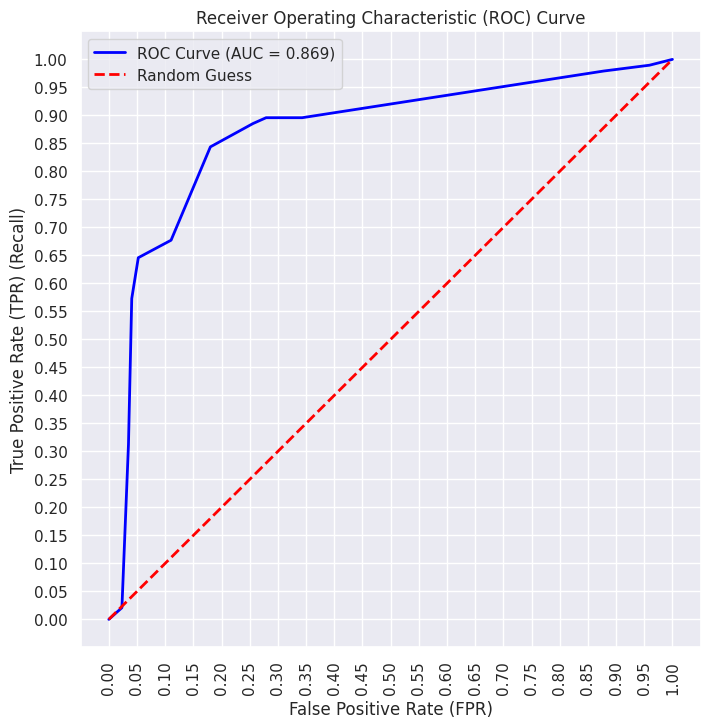

In [15]:
# Call the plot_roc_curve function with the actual labels (ytest) and predicted probabilities
plot_roc_curve(ytest, decision_tree_predicted_probability)

## Plot the Decision Tree with Specified Size and Features

To visualize the decision tree model, we use the `plot_tree` function from `sklearn.tree`, which generates a graphical representation of the tree. The following code creates a subplot with a specified size, and the decision tree is plotted within this subplot.


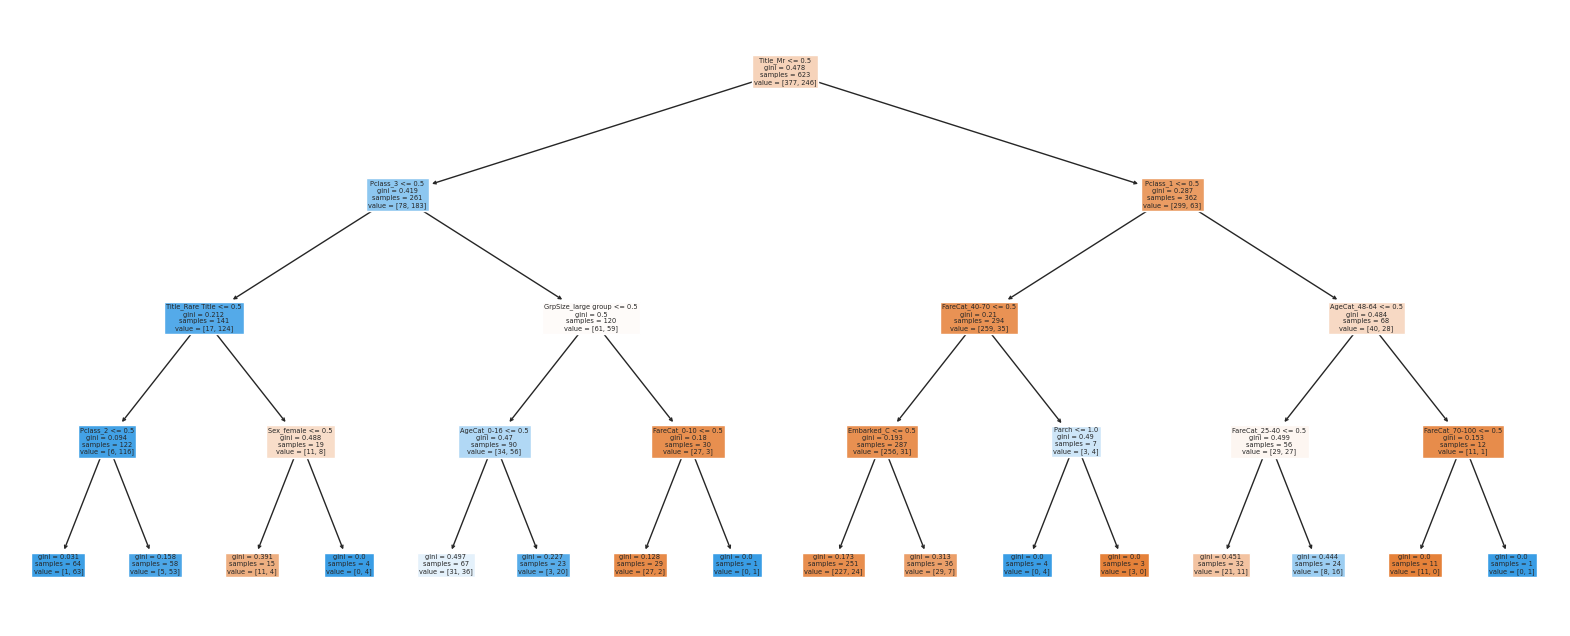

In [16]:
# Create a subplot with specified size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), dpi=100, sharey=True, facecolor='w')

# Plot the decision tree using the model and feature names
out = tree.plot_tree(
    decision_tree_model, 
    feature_names=list(X.columns), 
    filled=True, 
    ax=axes  # Ensure the plot appears in the specified subplot axis
)

# Optionally display the plot
plt.show()


## Retrieve the Feature Importances from the Trained Decision Tree Model

To understand the contribution of each feature in the decision-making process of the trained decision tree model, we can retrieve the feature importances using the `feature_importances_` attribute.


In [17]:
# Get the feature importances from the trained decision tree model
decision_tree_model.feature_importances_

array([0.        , 0.02160322, 0.05963196, 0.00191016, 0.12283849,
       0.02140108, 0.        , 0.00387507, 0.        , 0.        ,
       0.        , 0.        , 0.53101786, 0.        , 0.05814327,
       0.        , 0.        , 0.07732652, 0.        , 0.0105595 ,
       0.        , 0.        , 0.01802143, 0.018493  , 0.01155172,
       0.02381936, 0.        , 0.        , 0.01980736, 0.        ])

## Print the Column Names of the Input Data `X`

To display the column names of the input dataset `X`, you can use the following code:


In [18]:
# Print the column names of the input data X
X.columns

Index(['SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare Title',
       'GrpSize_couple', 'GrpSize_group', 'GrpSize_large group',
       'GrpSize_solo', 'FareCat_0-10', 'FareCat_10-25', 'FareCat_100+',
       'FareCat_25-40', 'FareCat_40-70', 'FareCat_70-100', 'AgeCat_0-16',
       'AgeCat_16-32', 'AgeCat_32-48', 'AgeCat_48-64', 'AgeCat_64+'],
      dtype='object')

## Create a DataFrame with Feature Names and Their Corresponding Importance Scores

To analyze the importance of each feature in the trained decision tree model, we can create a DataFrame containing the feature names and their corresponding importance scores. The following code sorts the features by importance in descending order and displays those with non-zero importance.


In [19]:
# Create a DataFrame with feature names and their corresponding importance scores
important_features = pd.DataFrame({
    'Feature Names': X.columns, 
    'Importance': decision_tree_model.feature_importances_
})

# Sort the features by importance in descending order and reset the index
important_features_sorted = important_features.sort_values("Importance", ascending=False, ignore_index=True)

# Filter and display features with non-zero importance
important_features_sorted[important_features_sorted['Importance'] > 0]

,Feature Names,Importance
0,Title_Mr,0.531018
1,Pclass_3,0.122838
2,GrpSize_large group,0.077327
3,Pclass_1,0.059632
4,Title_Rare Title,0.058143
5,AgeCat_0-16,0.023819
6,Parch,0.021603
7,Sex_female,0.021401
8,AgeCat_48-64,0.019807
9,FareCat_40-70,0.018493


## Plot the Feature Importance using a Bar Plot

To visualize the importance of each feature in the decision tree model, we can use a bar plot. This will show the features along the x-axis and their corresponding importance scores on the y-axis.

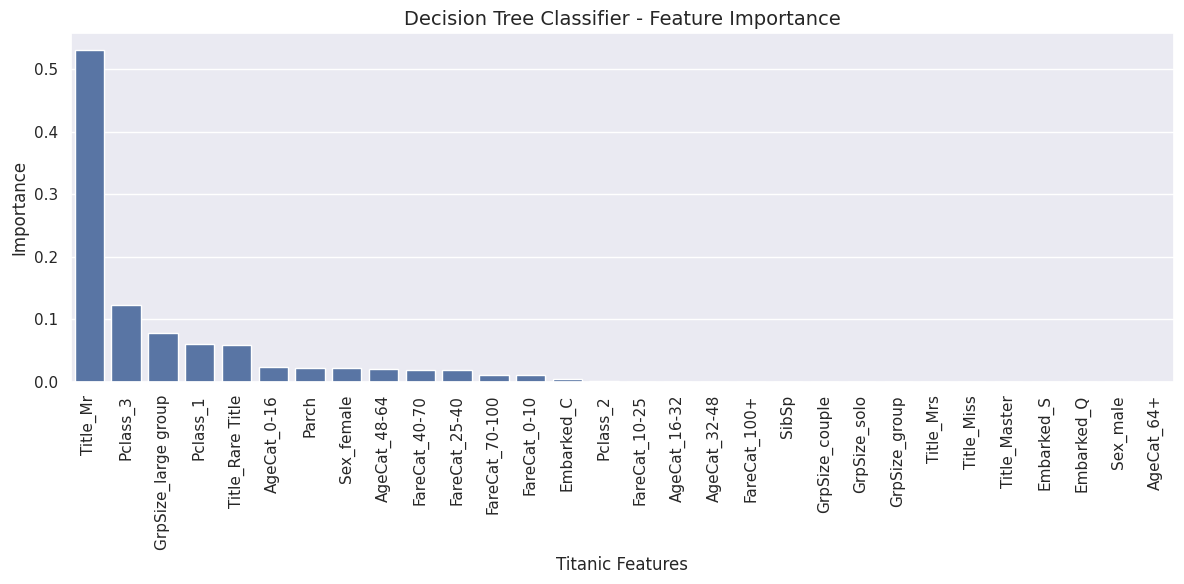

In [20]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the barplot for feature importance
sns.barplot(x="Feature Names", y="Importance", data=important_features_sorted, color='b')

# Label the axes
plt.xlabel("Titanic Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title for the plot
plt.title("Decision Tree Classifier - Feature Importance", fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

## Call the `model_parameter_selection` Function with Specified Parameters

To perform hyperparameter tuning for the decision tree model, we use the `model_parameter_selection` function, specifying the feature sets for training and testing, labels, and the hyperparameter to tune. In this case, we are tuning the `maximum_depth` of the decision tree.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

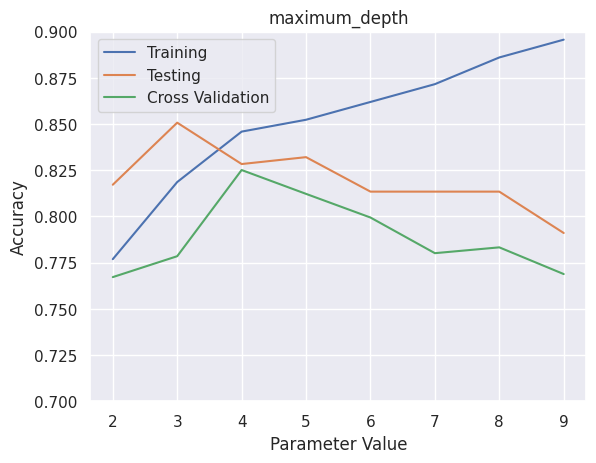

In [21]:
# Call the model_parameter_selection function with specified parameters
model_parameter_selection(
    xtrain=xtrain,        # Feature set for training
    ytrain=ytrain,        # Labels for training
    xtest=xtest,          # Feature set for testing
    ytest=ytest,          # Labels for testing
    loop_range_start=2,   # Start value for the hyperparameter loop (inclusive)
    loop_range_end=10,    # End value for the hyperparameter loop (exclusive)
    parameter_selection='maximum_depth'  # Hyperparameter to tune
)

### Call the `model_parameter_selection` Function with 'minimum_samples_split' Hyperparameter

To perform hyperparameter tuning on the decision tree model, we use the `model_parameter_selection` function, specifying the `minimum_samples_split`


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

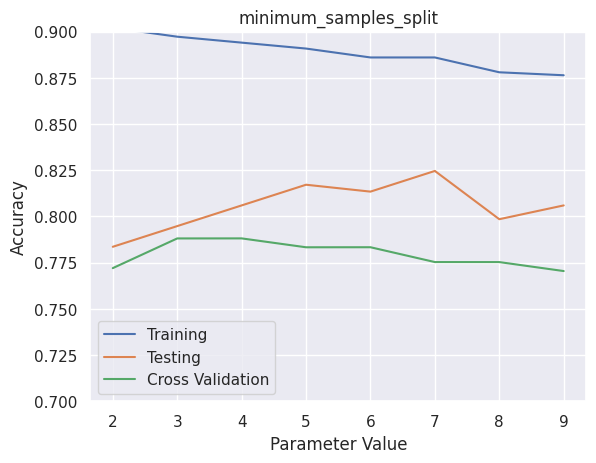

In [22]:
# Call the model_parameter_selection function with 'minimum_samples_split' hyperparameter
model_parameter_selection(
    xtrain=xtrain,                 # Feature set for training
    ytrain=ytrain,                 # Labels for training
    xtest=xtest,                   # Feature set for testing
    ytest=ytest,                   # Labels for testing
    loop_range_start=2,            # Starting value for the hyperparameter loop (inclusive)
    loop_range_end=10,             # Ending value for the hyperparameter loop (exclusive)
    parameter_selection='minimum_samples_split'  # Hyperparameter to tune
)

### Call the `model_parameter_selection` Function with 'minimum_samples_leaf' Hyperparameter

To perform hyperparameter tuning on the decision tree model, we use the `model_parameter_selection` function, specifying the `minimum_samples_leaf` hyperparameter. This controls the minimum number of samples required to be at a leaf node.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

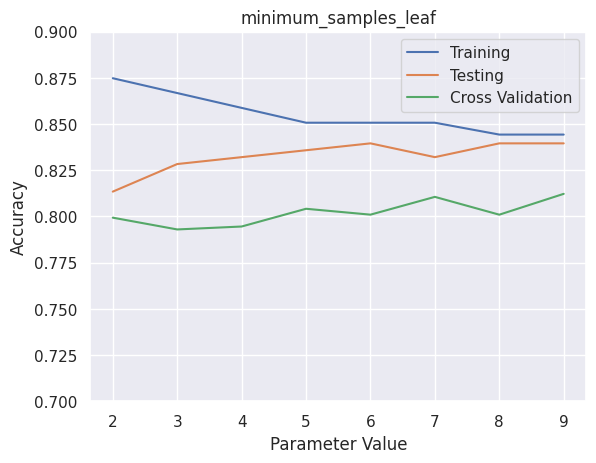

In [23]:
# Call the model_parameter_selection function with 'minimum_samples_leaf' hyperparameter
model_parameter_selection(
    xtrain=xtrain,                    # Feature set for training
    ytrain=ytrain,                    # Labels for training
    xtest=xtest,                      # Feature set for testing
    ytest=ytest,                      # Labels for testing
    loop_range_start=2,               # Starting value for the hyperparameter loop (inclusive)
    loop_range_end=10,                # Ending value for the hyperparameter loop (exclusive)
    parameter_selection='minimum_samples_leaf'  # Hyperparameter to tune
)

## 🧠 Tuned Decision Tree Classifier

I trained a Decision Tree Classifier with different tuned parameters to improve model performance and reduce overfitting. The tuning process involved adjusting the following hyperparameters:

- **`max_depth`**: Controls how deep the tree can grow. A smaller depth helps prevent overfitting.
- **`min_samples_split`**: The minimum number of samples required to split an internal node.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node.
- **`criterion`**: Determines the function used to measure the quality of a split (e.g., `'gini'` or `'entropy' ` or  `'log_loss'`).

These parameters were selected based on testing and evaluation using performance metrics such as Accuracy, Precision, Recall, and F1 Score, as well as visual tools like the ROC Curve and feature importance plots.

The goal was to find a balance between model complexity and generalization ability on unseen data.


In [24]:
# Initialize a Decision Tree Classifier with specified parameters
decision_tree_model_tuned = DecisionTreeClassifier(
    max_depth=4,               # Limit the depth of the tree to reduce overfitting
    min_samples_split=9,
    min_samples_leaf=8,
    criterion='entropy',       # Use entropy for split quality
    random_state=random_state_value            # Ensure reproducibility
)

# Train the Decision Tree Classifier on the training data
decision_tree_model_tuned.fit(xtrain, ytrain)

# Predict the labels for the test data using the trained Decision Tree model
decision_tree_predicted_tuned = decision_tree_model_tuned.predict(xtest)

# Predict the probabilities for the test data (for the positive class)
decision_tree_predicted_probability_tuned = decision_tree_model_tuned.predict_proba(xtest)[:, 1]

# Call the all_in_one function to generate the classification report and evaluation metrics
all_in_one(ytest, decision_tree_predicted_tuned)



 [--Classification Report--] 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       172
           1       0.75      0.82      0.78        96

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268


 [----Confusion Matrix-----] 

             pred_Survived (TP/FP) pred_Not Survived (FN/TN)
Survived                     TP 79                     FN 17
Not Survived                 FP 27                    TN 145 


 [---------Metrics---------] 

Accuracy:   0.835820895522388
Precision:  0.7452830188679245
Recall:     0.8229166666666666
F1 Score:   0.7821782178217821

------------------------------ 

Higher TPR (True Positive Rate) is better!
TPR measures how many of the actual positive cases (actual 'Yes') were correctly predicted as positive ('Yes').
In other words, it tells us how well the model captures true positive cases (sen

## Load the CSV File into a DataFrame and Display the First Few Rows

To load a CSV file into a pandas DataFrame, we use the `pd.read_csv()` function. We can then create a copy of the DataFrame and display the first few rows to examine the structure of the dataset.


In [25]:
# Load the CSV file into a DataFrame
test = pd.read_csv('/kaggle/input/titanic-dataset/competition_clean.csv')

# Create a copy of the DataFrame
dataframe_test = test.copy()

# Display the first few rows of the dataset
dataframe_test.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


## Display the Shape of the DataFrame

To understand the dimensions of the dataset, we can use the `shape` attribute of the DataFrame. This returns the number of rows and columns in the dataset.


In [26]:
# Display the shape of the DataFrame (number of rows and columns)
dataframe_test.shape

(418, 10)

## Perform One-Hot Encoding on Specified Categorical Columns

To convert categorical variables into a numerical format, we use One-Hot Encoding. This technique creates new binary columns for each category in the specified columns. After encoding, we convert all columns to integers for consistency.


In [27]:
# Perform One-Hot Encoding on specified categorical columns
df_OneHot = pd.get_dummies(dataframe_test, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrpSize', 'FareCat', 'AgeCat'])

# Convert the data type of all columns to integers (for consistency)
df_OneHot = df_OneHot.astype(int)

# Create a copy of the OneHot encoded DataFrame to preserve original data
dataframe_test = df_OneHot.copy()

# Display the first few rows of the modified DataFrame
dataframe_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Extract and Drop the 'PassengerId' Column

In this step, we first extract the `PassengerId` column from the DataFrame, as it may be useful for identification purposes later. After extracting it, we drop the column from the DataFrame, since it is no longer needed for modeling.


In [28]:
# Extract 'PassengerId' column before dropping it
PassengerID = dataframe_test['PassengerId']

# Drop the 'PassengerId' column from the DataFrame as it's no longer needed for modeling
dataframe_test.drop('PassengerId', axis=1, inplace=True)

# Display the modified DataFrame after removing 'PassengerId'
dataframe_test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## Make Predictions Using the Trained Decision Tree Model

After preprocessing the test data, we can use the trained decision tree model to make predictions on the test set. The `predict()` function of the model is used to generate predictions.


In [29]:
# Use the trained decision tree model to make predictions on the processed test data
pred_final = decision_tree_model.predict(dataframe_test)

# Display the predictions (optional, you can inspect the results)
print(pred_final)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 0 1 1 1 1 0 1 0 0 1]


## Create a Submission DataFrame with 'PassengerId' and Predicted 'Survived' Values

To prepare the results for submission, we create a new DataFrame that includes the `PassengerId` and the model's predicted `Survived` values. This is typically done when preparing the output for competitions or evaluations.


In [30]:
# Create a DataFrame for the submission with 'PassengerId' and the predicted 'Survived' values
submission = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final})

# Display the first few rows of the submission DataFrame to verify the structure
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Display the Shape of the Submission DataFrame

To confirm the dimensions of the submission DataFrame, we use the `shape` attribute. This will give us the number of rows and columns in the DataFrame, ensuring the structure is as expected.


In [31]:
# Display the shape of the submission DataFrame
submission.shape

(418, 2)

## Save the Submission DataFrame to a CSV File

After preparing the submission DataFrame, we save it as a CSV file without the index. This file can be used for submission or further analysis.


In [32]:
# Save the submission DataFrame to a CSV file without the index
submission.to_csv('my_submission_with_decision_tree_simple_v1.2.csv', index=False)

# Confirm the file has been saved (optional)
print("Submission file has been saved as 'my_submission_with_decision_tree_simple_v1.2.csv'")

Submission file has been saved as 'my_submission_with_decision_tree_simple_v1.2.csv'
